# Reseau de neurone Recurrent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv("Recurrent_Neuronal_Datasets/Google_Stock_Price_Train.csv")
#get only column 'open'
training_set = dataset_train[["Open"]]
#training_set to array
training_set = training_set.values

In [4]:
from sklearn.preprocessing import MinMaxScaler
#creating objet for normalisation normalisation 
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
# Or contex value is 60 days and predict length is 1 day
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
 X_train.shape[1]

60

In [9]:
# Importing the Keras libraries and packages
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Initialising the RNN
regressor = Sequential()

In [9]:
# Adding the first LSTM layer and some Dropout regularisation
#X_train.shape[1] = 60
regressor.add(LSTM(units = 50, return_sequences = True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#1st hidden layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#2nd hidden layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#3rd hidden layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

In [10]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 32s 27ms/step - loss: 0.0404
Epoch 2/100
1198/1198 [==============================] - 21s 17ms/step - loss: 0.0052
Epoch 3/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 28s 23ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [============================

In [14]:
from keras.models import model_from_json
# serialize model to JSON
model_json = regressor.to_json()
with open("modelRNN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
regressor.save_weights("modelRNN.h5")
print("Saved model to disk")

Saved model to disk


# Test 

In [57]:
# TEST
dataset_test = pd.read_csv("Recurrent_Neuronal_Datasets/Google_Stock_Price_Test.csv")
real_value = dataset_test[["Open"]].values

In [76]:
#voncatenation on line
dataset_total = pd.concat((dataset_train[["Open"]],dataset_test[["Open"]]),axis =0)
with open('dataset_total.txt', 'w') as f:
    for item in dataset_total.values:
        f.write("%s\n" % item)

In [77]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = sc.transform(inputs)

In [78]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print np.shape(X_test)

(20, 60, 1)


In [79]:
predict_value_normaled = regressor.predict(X_test)

In [ ]:
# inversion of normalisation 
predict_value = sc.inverse_transform(predict_value_normaled)
with open('predict_value.txt', 'w') as f:
    for item in predict_value:
        f.write("%s\n" % item)

Result ploting

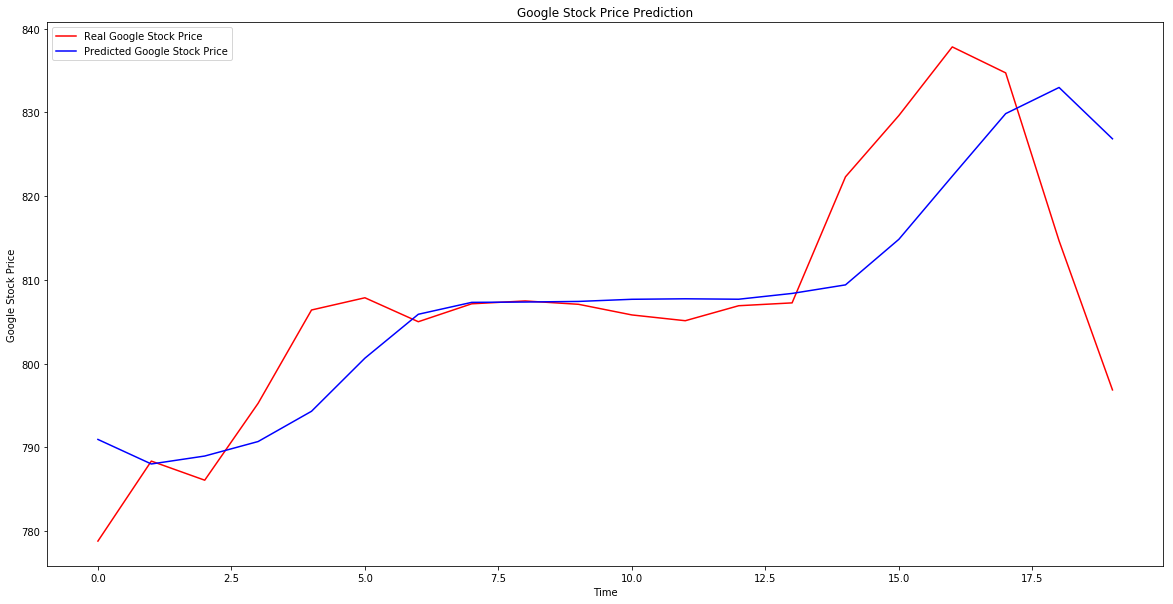

In [66]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(real_value, color = 'red', label = 'Real Google Stock Price')
plt.plot(predict_value, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend() 
plt.show()